In [22]:
import matplotlib.pyplot as plt

class Nodo:
    def __init__(self, valor):
        self.valor = valor
        self.izquierda = None
        self.derecha = None
        self.altura = 1

class ArbolAVL:
    def __init__(self):
        self.root = None

    def getAltura(self, raiz):
        if not raiz:
            return 0
        return raiz.altura

    def getBalance(self, raiz):
        if not raiz:
            return 0
        return self.getAltura(raiz.izquierda) - self.getAltura(raiz.derecha)

    def rotarDerecha(self, y):
        x = y.izquierda
        T2 = x.derecha

        x.derecha = y
        y.izquierda = T2

        y.altura = 1 + max(self.getAltura(y.izquierda), self.getAltura(y.derecha))
        x.altura = 1 + max(self.getAltura(x.izquierda), self.getAltura(x.derecha))

        return x

    def rotarIzquierda(self, x):
        y = x.derecha
        T2 = y.izquierda

        y.izquierda = x
        x.derecha = T2

        x.altura = 1 + max(self.getAltura(x.izquierda), self.getAltura(x.derecha))
        y.altura = 1 + max(self.getAltura(y.izquierda), self.getAltura(y.derecha))

        return y

    def insertar(self, raiz, valor):
        if not raiz:
            return Nodo(valor)
        elif valor < raiz.valor:
            raiz.izquierda = self.insertar(raiz.izquierda, valor)
        else:
            raiz.derecha = self.insertar(raiz.derecha, valor)

        raiz.altura = 1 + max(self.getAltura(raiz.izquierda), self.getAltura(raiz.derecha))
        balance = self.getBalance(raiz)

        if balance > 1 and valor < raiz.izquierda.valor:
            return self.rotarDerecha(raiz)
        if balance < -1 and valor > raiz.derecha.valor:
            return self.rotarIzquierda(raiz)
        if balance > 1 and valor > raiz.izquierda.valor:
            raiz.izquierda = self.rotarIzquierda(raiz.izquierda)
            return self.rotarDerecha(raiz)
        if balance < -1 and valor < raiz.derecha.valor:
            raiz.derecha = self.rotarDerecha(raiz.derecha)
            return self.rotarIzquierda(raiz)

        return raiz

    def getMinValueNode(self, raiz):
        if raiz is None or raiz.izquierda is None:
            return raiz
        return self.getMinValueNode(raiz.izquierda)

    def eliminar(self, raiz, valor):
        if not raiz:
            return raiz
        elif valor < raiz.valor:
            raiz.izquierda = self.eliminar(raiz.izquierda, valor)
        elif valor > raiz.valor:
            raiz.derecha = self.eliminar(raiz.derecha, valor)
        else:
            if raiz.izquierda is None:
                temp = raiz.derecha
                raiz = None
                return temp
            elif raiz.derecha is None:
                temp = raiz.izquierda
                raiz = None
                return temp

            temp = self.getMinValueNode(raiz.derecha)
            raiz.valor = temp.valor
            raiz.derecha = self.eliminar(raiz.derecha, temp.valor)

        raiz.altura = 1 + max(self.getAltura(raiz.izquierda), self.getAltura(raiz.derecha))
        balance = self.getBalance(raiz)

        if balance > 1 and self.getBalance(raiz.izquierda) >= 0:
            return self.rotarDerecha(raiz)
        if balance < -1 and self.getBalance(raiz.derecha) <= 0:
            return self.rotarIzquierda(raiz)
        if balance > 1 and self.getBalance(raiz.izquierda) < 0:
            raiz.izquierda = self.rotarIzquierda(raiz.izquierda)
            return self.rotarDerecha(raiz)
        if balance < -1 and self.getBalance(raiz.derecha) > 0:
            raiz.derecha = self.rotarDerecha(raiz.derecha)
            return self.rotarIzquierda(raiz)

        return raiz

    def plot_tree(self, raiz, x, y, dx):
        if raiz:
            plt.text(x, y, str(raiz.valor), color='black', fontsize=60, ha='center', va='center')
            if raiz.izquierda:
                x_izquierda = x - dx
                y_izquierda = y - 1.5
                plt.plot([x, x_izquierda], [y, y_izquierda], 'bo-')
                plt.plot([x, x_izquierda], [y, y_izquierda], 'b-')
                self.plot_tree(raiz.izquierda, x_izquierda, y_izquierda, dx / 2)
            if raiz.derecha:
                x_derecha = x + dx
                y_derecha = y - 1.5
                plt.plot([x, x_derecha], [y, y_derecha], 'bo-')
                plt.plot([x, x_derecha], [y, y_derecha], 'b-')
                self.plot_tree(raiz.derecha, x_derecha, y_derecha, dx / 2)

    def imprimir_arbol(self):
        if self.root is None:
            print("El árbol está vacío.")
        else:
            depth = self.root.altura
            width = 2 ** (depth - 1) * 20
            plt.figure(figsize=(width, depth * 2))
            self.plot_tree(self.root, width / 2, depth * 1.5, width / 4)
            plt.axis('off')
            plt.show()

    def construirArbol(self, lista):
        raiz = None
        for valor in lista:
            raiz = self.insertar(raiz, valor)
        self.root = raiz

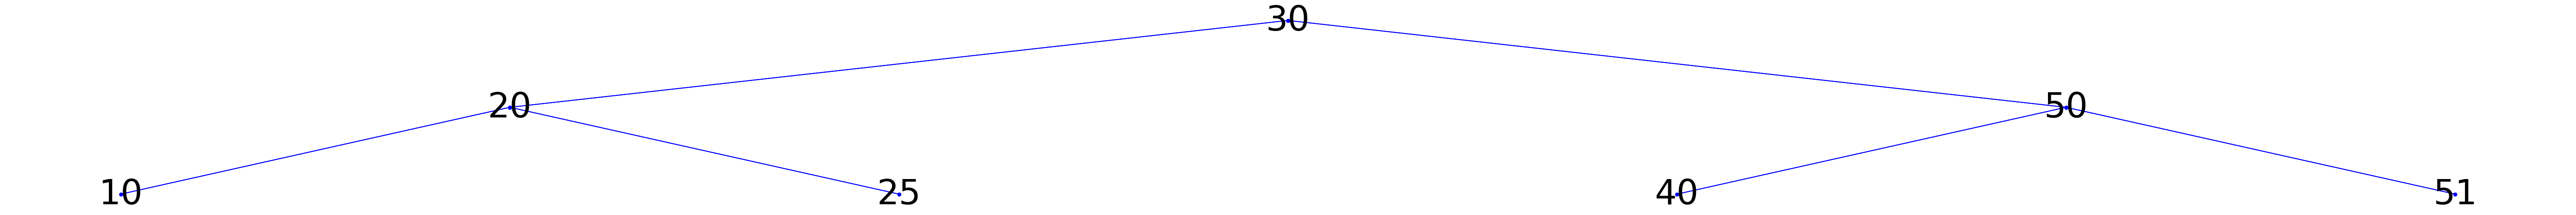

In [41]:
valores = [10, 20, 30, 40, 50, 25,51]
arbol = ArbolAVL()
arbol.construirArbol(valores)
arbol.imprimir_arbol()

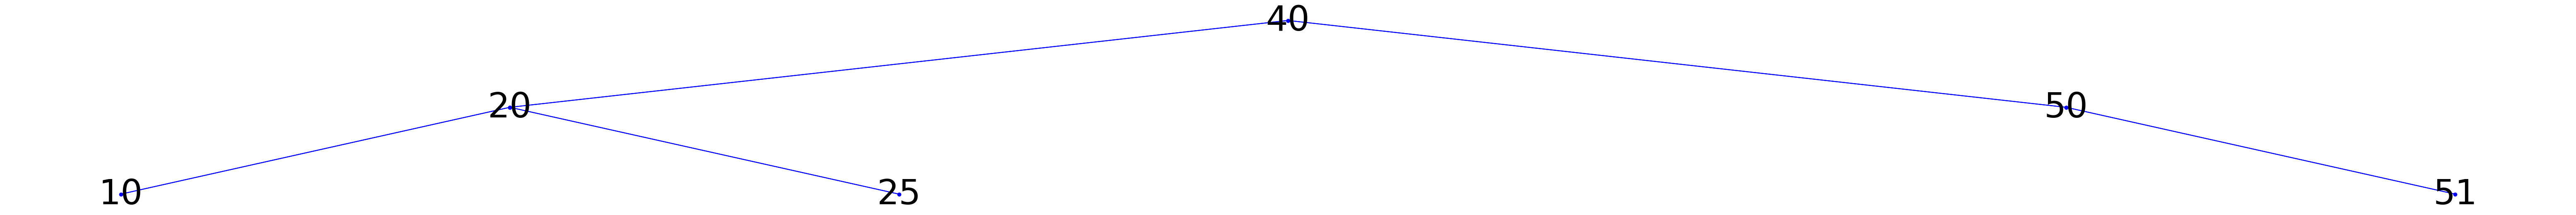

In [42]:
arbol.eliminar(arbol.root, 30)
arbol.imprimir_arbol()

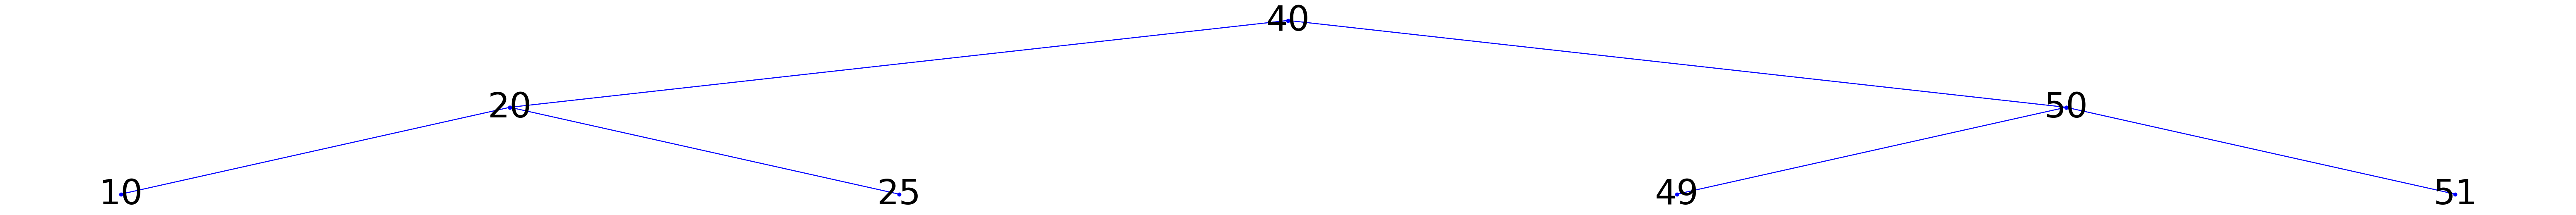

In [43]:
arbol.insertar(arbol.root, 49)
arbol.imprimir_arbol()

In [8]:
class Nodo:
    def __init__(self, valor):
        self.valor = valor
        self.izquierda = None
        self.derecha = None

class ArbolBinario:
    def __init__(self):
        self.root = None

    def insertar(self, valor):
        self.root = self._insertar_recursivo(self.root, valor)

    def _insertar_recursivo(self, nodo, valor):
        if nodo is None:
            return Nodo(valor)
        if valor < nodo.valor:
            nodo.izquierda = self._insertar_recursivo(nodo.izquierda, valor)
        else:
            nodo.derecha = self._insertar_recursivo(nodo.derecha, valor)
        return nodo

    def eliminar(self, valor):
        self.root = self._eliminar_recursivo(self.root, valor)

    def _eliminar_recursivo(self, nodo, valor):
        if nodo is None:
            return nodo
        if valor < nodo.valor:
            nodo.izquierda = self._eliminar_recursivo(nodo.izquierda, valor)
        elif valor > nodo.valor:
            nodo.derecha = self._eliminar_recursivo(nodo.derecha, valor)
        else:
            if nodo.izquierda is None:
                return nodo.derecha
            elif nodo.derecha is None:
                return nodo.izquierda
            nodo.valor = self._min_valor_nodo(nodo.derecha)
            nodo.derecha = self._eliminar_recursivo(nodo.derecha, nodo.valor)
        return nodo

    def _min_valor_nodo(self, nodo):
        while nodo.izquierda is not None:
            nodo = nodo.izquierda
        return nodo.valor

    def imprimir_arbol(self):
        if self.root is None:
            print("El árbol está vacío.")
        else:
            depth = self._calcular_altura(self.root)
            width = 2 ** (depth - 1) * 20
            plt.figure(figsize=(width, depth * 2))
            self._plot_tree(self.root, width / 2, depth * 1.5, width / 4)
            plt.axis('off')
            plt.show()

    def _calcular_altura(self, nodo):
        if nodo is None:
            return 0
        return 1 + max(self._calcular_altura(nodo.izquierda), self._calcular_altura(nodo.derecha))

    def _plot_tree(self, nodo, x, y, dx):
        if nodo:
            plt.text(x, y, str(nodo.valor), color='black', fontsize=40, ha='center', va='center')
            if nodo.izquierda:
                x_izquierda = x - dx
                y_izquierda = y - 1.5
                plt.plot([x, x_izquierda], [y, y_izquierda], 'bo-')
                plt.plot([x, x_izquierda], [y, y_izquierda], 'b-')
                self._plot_tree(nodo.izquierda, x_izquierda, y_izquierda, dx / 2)
            if nodo.derecha:
                x_derecha = x + dx
                y_derecha = y - 1.5
                plt.plot([x, x_derecha], [y, y_derecha], 'bo-')
                plt.plot([x, x_derecha], [y, y_derecha], 'b-')
                self._plot_tree(nodo.derecha, x_derecha, y_derecha, dx / 2)



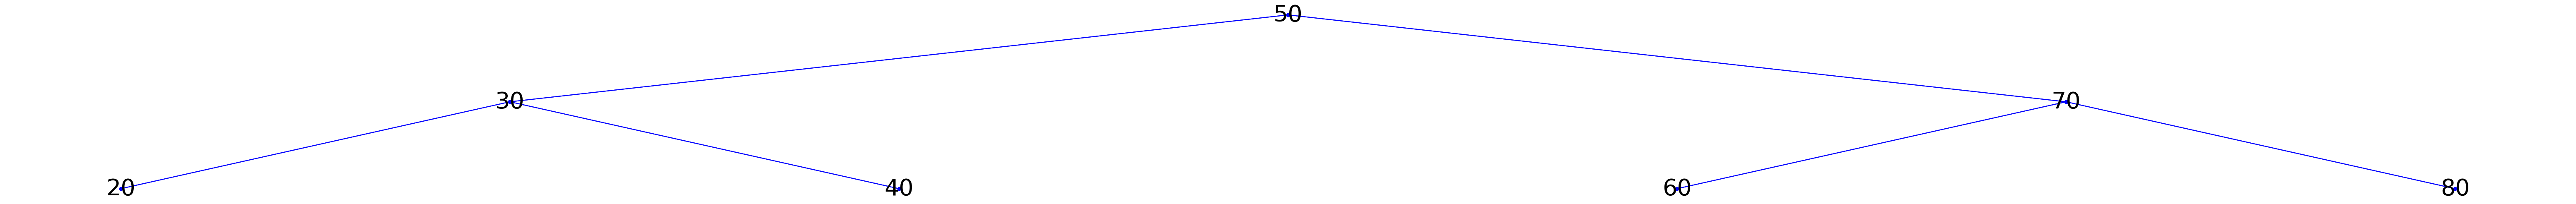

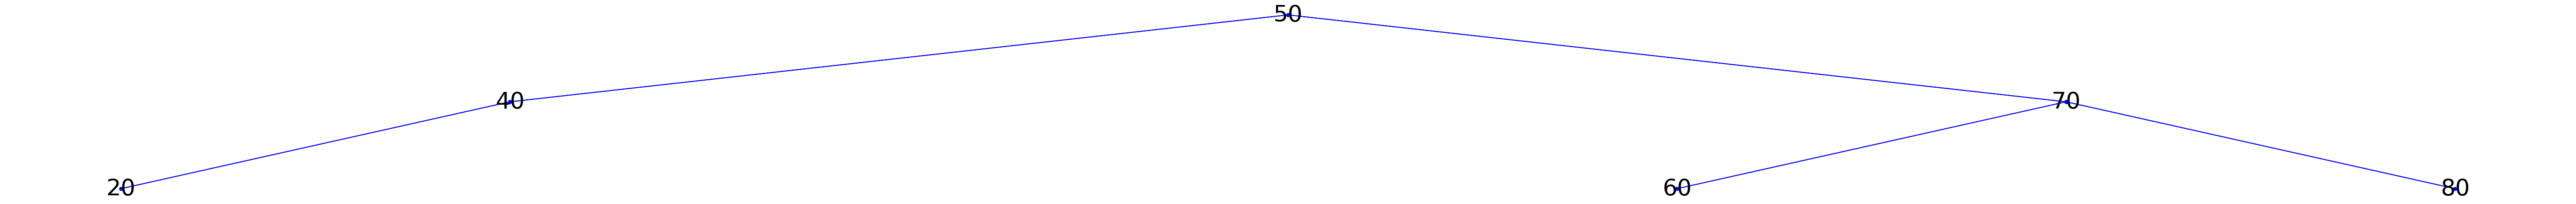

In [9]:
arbol = ArbolBinario()
valores = [50, 30, 70, 20, 40, 60, 80]
for valor in valores:
    arbol.insertar(valor)

arbol.imprimir_arbol()

# Eliminar un nodo
arbol.eliminar(30)
arbol.imprimir_arbol()